## Calculations

In [1]:
from sympy import Symbol, cos, sin, Rational, Matrix
from sympy.physics.mechanics import dynamicsymbols, mechanics_printing, mprint
from IPython.display import display

mechanics_printing()

time = Symbol("t")
cart_position = dynamicsymbols("x")
pole_angle = dynamicsymbols("theta")
cart_velocity = cart_position.diff()
pole_angular_velocity = pole_angle.diff()
pendulums_length = Symbol("l")
pendulum_mass_kg = Symbol("m")
pole_inertia = Symbol("i_p")
cart_mass_kg = Symbol("m_c")
g = Symbol("g")

x_position = cart_position + pendulums_length * sin(pole_angle)
y_position = pendulums_length * cos(pole_angle)

x_velocity = x_position.diff(time)
y_velocity = y_position.diff(time)

display(x_velocity)
display(y_velocity)

x_accelerations = x_velocity.diff(time)
y_accelerations = y_velocity.diff(time)

display(x_accelerations)
display(y_accelerations)

In [2]:
velocity = (x_velocity**2 + y_velocity**2).simplify()
pole_kinetic_energy = (
    Rational(1, 2) * pendulum_mass_kg * velocity + Rational(1, 2) * pole_inertia * pole_angular_velocity**2
)
cart_kinetic_energy = Rational(1, 2) * cart_mass_kg * (cart_velocity**2)
kinetic_energy = Matrix([pole_kinetic_energy, cart_kinetic_energy])

display(kinetic_energy)

⎡    2     ⎛ 2  2                     2⎞⎤
⎢iₚ⋅θ̇    m⋅⎝l ⋅θ̇  + 2⋅l⋅cos(θ)⋅θ̇⋅ẋ + ẋ ⎠⎥
⎢───── + ───────────────────────────────⎥
⎢  2                    2               ⎥
⎢                                       ⎥
⎢                     2                 ⎥
⎢                m_c⋅ẋ                  ⎥
⎢                ──────                 ⎥
⎣                  2                    ⎦

In [3]:
potential_energy = Matrix([pendulum_mass_kg * g * pendulums_length * cos(pole_angle), 0])
display(potential_energy)

⎡g⋅l⋅m⋅cos(θ)⎤
⎢            ⎥
⎣     0      ⎦

In [4]:
lagrangian = kinetic_energy[0] + kinetic_energy[1] - potential_energy[0] - potential_energy[1]
display(lagrangian)

⎡              0              ⎤
⎢                             ⎥
⎣g⋅l⋅m⋅sin(θ) - l⋅m⋅sin(θ)⋅θ̇⋅ẋ⎦

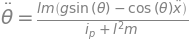

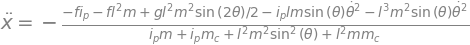

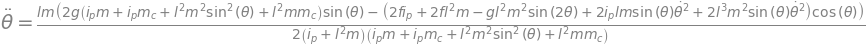

In [5]:
from sympy import *


q = Matrix([cart_position, pole_angle])
qd = Matrix([cart_velocity, pole_angular_velocity])
d_lagrangian_dx = lagrangian.diff(q)
d_lagrangian_ddx = lagrangian.diff(qd)
d_lagrangian_ddx_dt = d_lagrangian_ddx.diff(time)

lagrangian_equation = d_lagrangian_ddx_dt - d_lagrangian_dx
display(d_lagrangian_dx)

control_function = Symbol("f")

q2_lagrangian_equation = Equality(lagrangian_equation[1].simplify(), 0)
display(q2_lagrangian_equation)
angular_accelerations_coefficients = q2_lagrangian_equation.lhs.coeff(pole_angular_velocity.diff())
display(angular_accelerations_coefficients)
q2_lagrangian_equation = Equality(q2_lagrangian_equation.lhs - angular_accelerations_coefficients * pole_angular_velocity.diff(), q2_lagrangian_equation.rhs - angular_accelerations_coefficients * pole_angular_velocity.diff()).simplify()
display(q2_lagrangian_equation)
q2_lagrangian_equation = Equality(q2_lagrangian_equation.lhs  / angular_accelerations_coefficients, q2_lagrangian_equation.rhs / angular_accelerations_coefficients).simplify()
display(q2_lagrangian_equation)

q1_lagrangian_equation = Equality(lagrangian_equation[0].expand(), control_function)
q1_lagrangian_equation = q1_lagrangian_equation.subs(pole_angular_velocity.diff(), q2_lagrangian_equation.rhs.simplify())
q1_lagrangian_equation = Equality(q1_lagrangian_equation.lhs - control_function, q1_lagrangian_equation.rhs - control_function)
q1_lagrangian_equation = Equality(q1_lagrangian_equation.lhs.expand(), q1_lagrangian_equation.rhs)
cart_accelerations_coefficients = q1_lagrangian_equation.lhs.coeff(cart_velocity.diff())
q1_lagrangian_equation = Equality(q1_lagrangian_equation.lhs - cart_accelerations_coefficients*cart_velocity.diff(), q1_lagrangian_equation.rhs - cart_accelerations_coefficients*cart_velocity.diff())
q1_lagrangian_equation = Equality(q1_lagrangian_equation.lhs / cart_accelerations_coefficients, q1_lagrangian_equation.rhs / cart_accelerations_coefficients).simplify()
display(q1_lagrangian_equation)


q2_lagrangian_equation = q2_lagrangian_equation.subs(cart_velocity.diff(), q1_lagrangian_equation.rhs).simplify()
display(q2_lagrangian_equation)

state_derivative = Matrix([cart_velocity, pole_angular_velocity, q1_lagrangian_equation.rhs.expand(), q2_lagrangian_equation.rhs.simplify()])

In [6]:
state_matrix = state_derivative.jacobian([cart_position, pole_angle, cart_velocity, pole_angular_velocity]).subs(pole_angle, 0)
input_matrix = state_derivative.jacobian([control_function]).subs(pole_angle, 0)

display(simplify(Matrix(state_matrix)))
display(simplify(Matrix(input_matrix)))

⎡0             0              1  0⎤
⎢                                 ⎥
⎢0             0              0  1⎥
⎢                                 ⎥
⎢              2  2               ⎥
⎢          -g⋅l ⋅m                ⎥
⎢0  ────────────────────────  0  0⎥
⎢                    2            ⎥
⎢   iₚ⋅m + iₚ⋅m_c + l ⋅m⋅m_c      ⎥
⎢                                 ⎥
⎢      l⋅m⋅(g⋅m + g⋅m_c)          ⎥
⎢0  ────────────────────────  0  0⎥
⎢                    2            ⎥
⎣   iₚ⋅m + iₚ⋅m_c + l ⋅m⋅m_c      ⎦

⎡           0            ⎤
⎢                        ⎥
⎢           0            ⎥
⎢                        ⎥
⎢             2          ⎥
⎢       iₚ + l ⋅m        ⎥
⎢────────────────────────⎥
⎢                 2      ⎥
⎢iₚ⋅m + iₚ⋅m_c + l ⋅m⋅m_c⎥
⎢                        ⎥
⎢         -l⋅m           ⎥
⎢────────────────────────⎥
⎢                 2      ⎥
⎣iₚ⋅m + iₚ⋅m_c + l ⋅m⋅m_c⎦

## In result we get

$$

\left[\begin{matrix}\dot{x}\\\dot{\theta}\\\ddot{x}\\\ddot{\theta}\end{matrix}\right]
= 
\left[\begin{matrix}0 & 0 & 1 & 0\\0 & 0 & 0 & 1\\0 & - \frac{g l^{2} m^{2}}{i_{p} m + i_{p} m_{c} + l^{2} m m_{c}} & 0 & 0\\0 & \frac{l m \left(g m + g m_{c}\right)}{i_{p} m + i_{p} m_{c} + l^{2} m m_{c}} & 0 & 0\end{matrix}\right]  \left[\begin{matrix}x\\\theta\\\dot{x}\\\dot{\theta}\end{matrix}\right] + \left[\begin{matrix}0\\0\\\frac{i_{p} + l^{2} m}{i_{p} m + i_{p} m_{c} + l^{2} m m_{c}}\\- \frac{l m}{i_{p} m + i_{p} m_{c} + l^{2} m m_{c}}\end{matrix}\right] f

$$

In [7]:
import numpy as np
import control
from scipy.signal import lsim, lti
import matplotlib.pyplot as plt

def get_state_matrix(length_to_pendulums_center_mass, pendulum_mass_kg, cart_mass_kg, pole_inertia):
    g = 9.81
    return np.array(
        [
            [0, 0, 1, 0],
            [0, 0, 0, 1],
            [
                0,
                -g
                * length_to_pendulums_center_mass**2
                * pendulum_mass_kg**2
                / (
                    pole_inertia * cart_mass_kg
                    + pole_inertia * pendulum_mass_kg
                    + cart_mass_kg * length_to_pendulums_center_mass**2 * pendulum_mass_kg
                ),
                0,
                0,
            ],
            [
                0,
                g
                * length_to_pendulums_center_mass
                * pendulum_mass_kg
                * (cart_mass_kg + pendulum_mass_kg)
                / (
                    pole_inertia * cart_mass_kg
                    + pole_inertia * pendulum_mass_kg
                    + cart_mass_kg * length_to_pendulums_center_mass**2 * pendulum_mass_kg
                ),
                0,
                0,
            ],
        ]
    )


def get_input_matrix(length_to_pendulums_center_mass, pendulum_mass_kg, cart_mass_kg, pole_inertia):
    return np.array(
        [
            [0],
            [0],
            [
                (-pole_inertia - length_to_pendulums_center_mass**2 * pendulum_mass_kg)
                / (
                    -pole_inertia * cart_mass_kg
                    - pole_inertia * pendulum_mass_kg
                    - cart_mass_kg * length_to_pendulums_center_mass**2 * pendulum_mass_kg
                )
            ],
            [
                length_to_pendulums_center_mass
                * pendulum_mass_kg
                / (
                    -pole_inertia * cart_mass_kg
                    - pole_inertia * pendulum_mass_kg
                    - cart_mass_kg * length_to_pendulums_center_mass**2 * pendulum_mass_kg
                )
            ],
        ]
    )


In [8]:
pendulum_mass_kg = 0.455
cart_mass_kg = 1.006
length_to_pendulums_center_mass = 0.435057
pole_inertia = 0.044096

state_matrix = get_state_matrix(length_to_pendulums_center_mass, pendulum_mass_kg, cart_mass_kg, pole_inertia)
input_matrix = get_input_matrix(length_to_pendulums_center_mass, pendulum_mass_kg, cart_mass_kg, pole_inertia)
controllability_matrix = control.ctrb(state_matrix, input_matrix)


print(f"Controllability matrix's rank: {np.linalg.matrix_rank(controllability_matrix, tol=1.0e-10)}")
print(f"Eigen values of state matrix (A): {np.linalg.eigvals(state_matrix)}")

Controllability matrix's rank: 4
Eigen values of state matrix (A): [ 0.          0.          4.33373483 -4.33373483]


In [9]:
poles = [-1, -2, -3, -4]
controller = control.place(state_matrix, input_matrix, poles)
print(f"Controller (K): {controller}")

state_matrix_new_eigen_values = state_matrix - input_matrix @ controller
print(f"System with new eigen values after adding controller: {np.linalg.eigvals(state_matrix_new_eigen_values)}")

controllability_matrix_with_new_eigen_values = control.ctrb(state_matrix_new_eigen_values, input_matrix)
print(
    f"Controllability matrix's rank: {np.linalg.matrix_rank(controllability_matrix_with_new_eigen_values, tol=1.0e-10)}"
)

Controller (K): [[ -1.86696764 -42.26984303  -3.88951591 -10.18982873]]
System with new eigen values after adding controller: [-4. -3. -2. -1.]
Controllability matrix's rank: 4


In [10]:
states_used_in_control_loop = np.array([0, 1, 0, 1])
state_vector = np.array([0.5, 0.1, 0, 0.1])

print(f"State: {state_vector}")
print(f"States to use in controller: {states_used_in_control_loop}")
print(f"Controller with certain states being used: {controller * states_used_in_control_loop}")
print(f"Controller's: {np.dot(controller * states_used_in_control_loop, state_vector)}")

State: [0.5 0.1 0.  0.1]
States to use in controller: [0 1 0 1]
Controller with certain states being used: [[ -0.         -42.26984303  -0.         -10.18982873]]
Controller's: [-5.24596718]


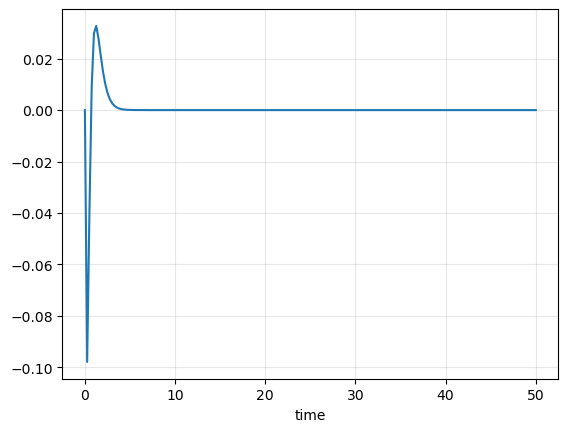

In [11]:
D = 0.0
system = lti(state_matrix_new_eigen_values, input_matrix, states_used_in_control_loop, D)
time = np.linspace(0, 50, num=200)
u = np.ones_like(time)
_, y, x = lsim(system, u, time)
plt.plot(time, y)
plt.grid(alpha=0.3)
plt.xlabel("time")
plt.show()